<a href="https://colab.research.google.com/github/marthinx/UdaCity/blob/main/MyAktien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Beschreibung
**Text fett markieren**

# Beschreibung

# benötigte Pakete
!pip install matplotlib-venn
!pip install yfinance

In [1]:
!pip install matplotlib-venn
!pip install yfinance
!pip install influxdb-client

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 524 kB 5.1 MB/s 
     |████████████████████████████████| 503 kB 54.8 MB/s 
     |████████████████████████████████| 199 kB 71.3 MB/s 
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


# Aktienkurse einlesen


**Text fett markieren**# Imports


In [ ]:
import yfinance as yf


ModuleNotFoundError: ignored

In [ ]:
msft = yf.Ticker("MSFT")
msft.info

{'52WeekChange': 0.6220828,
 'SandP52WeekChange': 0.3224138,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 1000,
 'averageDailyVolume10Day': 21004250,
 'averageVolume': 23643217,
 'averageVolume10days': 21004250,
 'beta': 0.862337,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 800,
 'bookValue': 20.242,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 341.27,
 'currentRatio': 2.165,
 'dateShortInterest': 1635465600,
 'dayHigh': 342.45,
 'dayLow': 337.13,
 'debtToEquity': 51.938,
 'dividendRate': 2.48,
 'dividendYield': 0.0073,
 'earningsGrowth': 0.489,
 'earningsQuarterlyGrowth': 0.476,
 'ebitda': 85745000448,
 'ebitdaMargins': 0.48648998,
 'enterpriseToEbitda': 29.28,
 'enterpriseToRevenue': 14.244,
 'enterpriseValue': 2510599487488,
 'exDividendDate': 1637107200,
 'exchange': 'NMS',


In [ ]:

msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-11-18,0.56,0.0
2021-02-17,0.56,0.0
2021-05-19,0.56,0.0


In [ ]:
# Dividenden ausgeben
msft.dividends




Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-11-18    0.56
2021-02-17    0.56
2021-05-19    0.56
2021-08-18    0.56
2021-11-17    0.62
Name: Dividends, Length: 72, dtype: float64

In [ ]:
# wann war die größte Dividende?
msft.dividends.nlargest(1)

Date
2004-11-15    3.08
Name: Dividends, dtype: float64

In [ ]:
# wann gab es Splits?
msft.splits

Series([], Name: Stock Splits, dtype: int64)

In [ ]:
# wie hat sich die Aktien in der Historie verhalten?
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-19,307.786921,308.735168,306.658979,307.667145,17682100,0.00,0
2021-10-20,308.645334,309.134460,305.550989,306.848633,16537100,0.00,0
2021-10-21,306.609065,310.452009,305.800516,310.192505,16918100,0.00,0
2021-10-22,309.833154,310.521897,307.237896,308.595428,17449300,0.00,0
2021-10-25,308.795056,308.834992,305.900358,307.567322,17554500,0.00,0
2021-10-26,310.432060,311.829497,308.036449,309.543671,28107300,0.00,0
2021-10-27,315.422944,325.504507,315.422944,322.579865,52588700,0.00,0
2021-10-28,323.737707,324.276730,320.773130,323.757690,26297900,0.00,0
2021-10-29,323.538092,331.393715,323.308501,331.014404,34744900,0.00,0


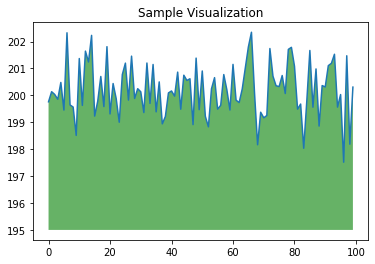

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# wie hat sich die Aktien in der Historie verhalten?
msft.history()

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

*kursiver Text*# Neuer Abschnitt

# Datenkurse laden


In [ ]:
goog = yf.download(tickers='GOOG', period = '5d', interval = '15m', rounding= True)
print(goog)


[*********************100%***********************]  1 of 1 completed
                              Open     High  ...  Adj Close  Volume
Datetime                                     ...                   
2021-11-12 09:30:00-05:00  2956.63  2958.30  ...    2935.26   85821
2021-11-12 09:45:00-05:00  2936.90  2945.98  ...    2942.15   36215
2021-11-12 10:00:00-05:00  2945.16  2961.44  ...    2958.88   31405
2021-11-12 10:15:00-05:00  2953.85  2964.20  ...    2960.48   32557
2021-11-12 10:30:00-05:00  2960.82  2960.84  ...    2952.90   32610
...                            ...      ...  ...        ...     ...
2021-11-18 14:45:00-05:00  3012.04  3014.26  ...    3013.17   16344
2021-11-18 15:00:00-05:00  3013.14  3016.92  ...    3015.16   14690
2021-11-18 15:15:00-05:00  3015.81  3020.12  ...    3020.12   18524
2021-11-18 15:30:00-05:00  3020.12  3024.14  ...    3023.82   34003
2021-11-18 15:45:00-05:00  3023.56  3024.84  ...    3014.33  142018

[130 rows x 6 columns]


# grafische Darstellung

In [ ]:
import plotly.graph_objs as go
import yfinance as yf
choice = input('Write a stock symbol: ')
choice = choice.upper()
data = yf.download(tickers=choice, period = '5d', interval = '15m', rounding= True)
fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
# fig.update_layout(title = choice + '' share price', yaxis_title = 'Stock Price (USD)'')
fig.update_layout(title = choice + ' share price', yaxis_title = 'Stock Price (USD)')
#fig.update_layout(title = choice + ‘ share price’, yaxis_title = ‘Stock Price (USD)’)
fig.update_xaxes(
rangeslider_visible=True,
rangeselector=dict(
buttons=list([
dict(count=15, label='15m', step='minute', stepmode='backward'),
dict(count=45, label='45m', step='minute', stepmode='backward'),
dict(count=1, label='1h', step='hour', stepmode='backward'),
dict(count=6, label='6h', step='hour', stepmode='backward'),
dict(step='all')
])
)
)
fig.show()

Write a stock symbol: goog
[*********************100%***********************]  1 of 1 completed


Mit Eingabemöglichkeit

# *Google*

In [ ]:
import plotly.graph_objs as go
import yfinance as yf

data = yf.download(tickers='GOOG', period = '5d', interval = '15m', rounding= True)
fig = go.Figure()
fig.add_trace(go.Candlestick(x=data.index,open = data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name = 'market data'))
fig.update_layout(title = ' Google share price', yaxis_title = 'Stock Price (USD)')
fig.update_xaxes(
rangeslider_visible=True,
rangeselector=dict(
buttons=list([
dict(count=15, label='15m', step='minute', stepmode='backward'),
dict(count=45, label='45m', step='minute', stepmode='backward'),
dict(count=1, label='1h', step='hour', stepmode='backward'),
dict(count=6, label='6h', step='hour', stepmode='backward'),
dict(step='all')
])
)
)
fig.show()

[*********************100%***********************]  1 of 1 completed


**Influx DB**

In [2]:
from datetime import datetime

from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

# You can generate an API token from the "API Tokens Tab" in the UI
token = "y4ged0GOeyye-Rcu_vpV5YQp_Ei82QM7B6CZEH-DAGtxtRWKaLFc4SgNlvZLXKOBYAj37xvNJOeB823T3QQmMQ=="
org = "martin.schottmann@gmail.com"
bucket = "martin.schottmann's Bucket"

with InfluxDBClient(url="https://eu-central-1-1.aws.cloud2.influxdata.com", token=token, org=org) as client:

SyntaxError: ignored

In [3]:
point = Point("mem") \
  .tag("host", "host1") \
  .field("used_percent", 23.43234543) \
  .time(datetime.utcnow(), WritePrecision.NS)

write_api.write(bucket, org, point)


NameError: ignored